# Mask R-CNN - Cityscapes inspect dataset

## Inizialization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import modules

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

ROOT_DIR = os.path.abspath("/content/drive/MyDrive/cityscapes/utils")
sys.path.append(ROOT_DIR)

import utils_cityscapes   # Matterport Mask R-CNN set-up
from utils_cityscapes import CityscapesConfig, CityscapesDataset

from mrcnn import visualize, utils
from mrcnn.model import log
import mrcnn.model as modellib

## Dataset

In [4]:
DATASET_DIR = "/content/drive/MyDrive/cityscapes/dataset/Semantic"

# Training dataset
dataset_train = utils_cityscapes.CityscapesDataset()
dataset_train.load_cityscapes(DATASET_DIR, "Train")   # Load dataset
dataset_train.prepare()   # Must call before using the dataset

# Validation dataset
dataset_val = utils_cityscapes.CityscapesDataset()
dataset_val.load_cityscapes(DATASET_DIR, "Val")
dataset_val.prepare()

# Test dataset
dataset_test = utils_cityscapes.CityscapesDataset()
dataset_test.load_cityscapes(DATASET_DIR, "Test")
dataset_test.prepare()

In [5]:
print("Training Image Count: {}".format(len(dataset_train.image_ids)))
print("Validation Image Count: {}".format(len(dataset_val.image_ids)))
print("Test Image Count: {}".format(len(dataset_test.image_ids)))
print()
print("Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Training Image Count: 1403
Validation Image Count: 326
Test Image Count: 174

Class Count: 11
  0. BG                                                
  1. person                                            
  2. rider                                             
  3. car                                               
  4. truck                                             
  5. bus                                               
  6. caravan                                           
  7. trailer                                           
  8. train                                             
  9. motorcycle                                        
 10. bicycle                                           


## Exploratory Data Analysis

In [6]:
class_map = {}

for elem in dataset_train.class_info:
  class_map[elem['id']] = elem['name']

### Train

In [7]:
all_file_dict_train = {}

for img_info in dataset_train.image_info:
  name_img = img_info['id']
  all_file_dict_train[name_img] = dict(Counter(img_info['class_ids']))

print("Number of training images:", len(all_file_dict_train))

Number of training images: 1403


In [8]:
train_df = pd.DataFrame(all_file_dict_train).T
train_df.columns = train_df.columns.to_series().map(class_map)

print('Number of instances per class')

train_df.head()

Number of instances per class


car  person  rider  ...  truck  caravan  train
aachen_000003_000019  10.0     1.0    NaN  ...    NaN      NaN    NaN
aachen_000007_000019   2.0     NaN    NaN  ...    NaN      NaN    NaN
aachen_000001_000019  15.0     NaN    NaN  ...    NaN      NaN    NaN
aachen_000008_000019   5.0    10.0    1.0  ...    NaN      NaN    NaN
aachen_000002_000019   7.0     1.0    NaN  ...    NaN      NaN    NaN

[5 rows x 10 columns]

In [9]:
print('Max number of instances per image: {}'.format(train_df.sum(axis=1).max()))

Max number of instances per image: 120.0


In [10]:
print('Max number of instances per class in a single image:')
print(train_df.max())

Max number of instances per class in a single image:
car           57.0
person        95.0
rider         10.0
motorcycle     7.0
bicycle       16.0
bus           10.0
trailer        2.0
truck          9.0
caravan        2.0
train          3.0
dtype: float64


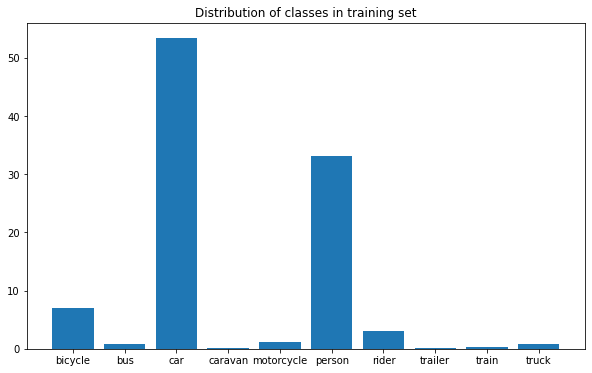

In [11]:
train_series = train_df.sum().sort_index()

plt.figure(figsize=(10,6))
plt.bar(train_series.index, train_series.values/train_series.sum()*100)
plt.title('Distribution of classes in training set')
plt.show();

In [12]:
idx = train_df.index[train_df.isnull().all(1)]
nans = train_df.loc[idx]
print('Empty images (no instances)')
nans

Empty images (no instances)


car  person  rider  ...  truck  caravan  train
bochum_000000_031152      NaN     NaN    NaN  ...    NaN      NaN    NaN
dusseldorf_000106_000019  NaN     NaN    NaN  ...    NaN      NaN    NaN
dusseldorf_000101_000019  NaN     NaN    NaN  ...    NaN      NaN    NaN

[3 rows x 10 columns]

### Validation

In [13]:
all_file_dict_val = {}

for img_info in dataset_val.image_info:
  name_img = img_info['id']
  all_file_dict_val[name_img] = dict(Counter(img_info['class_ids']))

print("Number of validation images:", len(all_file_dict_val))

Number of validation images: 326


In [14]:
val_df = pd.DataFrame(all_file_dict_val).T
val_df.columns = val_df.columns.to_series().map(class_map)
print('Number of instances per class')
val_df.head()

Number of instances per class


car  bicycle  rider  ...  bus  trailer  caravan
frankfurt_000000_018797  14.0      1.0    1.0  ...  NaN      NaN      NaN
frankfurt_000001_012870   3.0      7.0    3.0  ...  NaN      NaN      NaN
frankfurt_000001_007622   4.0      1.0    NaN  ...  NaN      NaN      NaN
frankfurt_000000_011007   4.0      NaN    NaN  ...  NaN      NaN      NaN
frankfurt_000001_013016   6.0      1.0    1.0  ...  NaN      NaN      NaN

[5 rows x 10 columns]

In [15]:
print('Max number of instances per image: {}'.format(val_df.sum(axis=1).max()))

Max number of instances per image: 66.0


In [16]:
print('Max number of instances per class in a single image:')
print(val_df.max())

Max number of instances per class in a single image:
car           39.0
bicycle        9.0
rider          9.0
truck          4.0
person        55.0
train          2.0
motorcycle     9.0
bus            5.0
trailer        1.0
caravan        1.0
dtype: float64


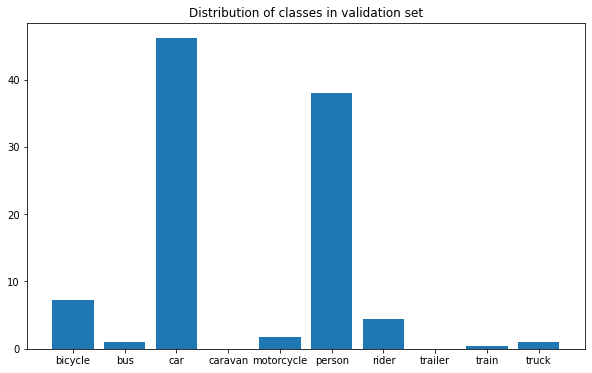

In [17]:
val_series = val_df.sum().sort_index()

plt.figure(figsize=(10,6))
plt.bar(val_series.index, val_series.values/val_series.sum()*100)
plt.title('Distribution of classes in validation set')
plt.show();

In [18]:
idx = val_df.index[val_df.isnull().all(1)]
nans = val_df.loc[idx]
print('Empty images (no instances):')
nans

Empty images (no instances):


car  bicycle  rider  ...  bus  trailer  caravan
lindau_000017_000019  NaN      NaN    NaN  ...  NaN      NaN      NaN
lindau_000021_000019  NaN      NaN    NaN  ...  NaN      NaN      NaN
lindau_000018_000019  NaN      NaN    NaN  ...  NaN      NaN      NaN
lindau_000019_000019  NaN      NaN    NaN  ...  NaN      NaN      NaN
lindau_000040_000019  NaN      NaN    NaN  ...  NaN      NaN      NaN
lindau_000032_000019  NaN      NaN    NaN  ...  NaN      NaN      NaN
lindau_000049_000019  NaN      NaN    NaN  ...  NaN      NaN      NaN
lindau_000045_000019  NaN      NaN    NaN  ...  NaN      NaN      NaN

[8 rows x 10 columns]

### Test

In [19]:
all_file_dict_test = {}

for img_info in dataset_test.image_info:
  name_img = img_info['id']
  all_file_dict_test[name_img] = dict(Counter(img_info['class_ids']))

print("Number of validation images:", len(all_file_dict_test))

Number of validation images: 174


In [20]:
test_df = pd.DataFrame(all_file_dict_test).T
test_df.columns = test_df.columns.to_series().map(class_map)
print('Number of instances per class')
test_df.head()

Number of instances per class


car  person  rider  ...  bus  motorcycle  trailer
munster_000026_000019  10.0     3.0    7.0  ...  NaN         NaN      NaN
munster_000019_000019  19.0     NaN    1.0  ...  NaN         NaN      NaN
munster_000030_000019   5.0     NaN    1.0  ...  1.0         NaN      NaN
munster_000074_000019  18.0     2.0    NaN  ...  NaN         NaN      NaN
munster_000092_000019  23.0     1.0    3.0  ...  NaN         NaN      NaN

[5 rows x 9 columns]

In [21]:
test_df['train'] = np.NaN   # missing 'train' class

In [22]:
print('Max number of instances per image: {}'.format(test_df.sum(axis=1).max()))

Max number of instances per image: 46.0


In [23]:
print('Max number of instances per class in a single image:')

print(test_df.max())

Max number of instances per class in a single image:
car           28.0
person        32.0
rider          8.0
truck          2.0
bicycle       22.0
caravan        1.0
bus            3.0
motorcycle     5.0
trailer        1.0
train          NaN
dtype: float64


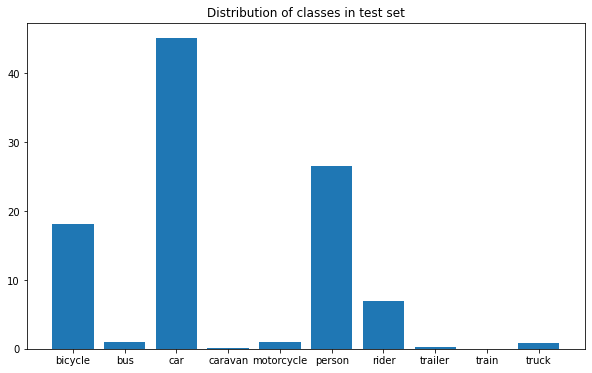

In [24]:
test_series = test_df.sum().sort_index()

plt.figure(figsize=(10,6))
plt.bar(test_series.index, test_series.values/test_series.sum()*100)
plt.title('Distribution of classes in test set')
plt.show();

In [25]:
idx = test_df.index[test_df.isnull().all(1)]
nans = test_df.loc[idx]
print('Empty images (no instances):')
nans

Empty images (no instances):


Empty DataFrame
Columns: [car, person, rider, truck, bicycle, caravan, bus, motorcycle, trailer, train]
Index: []

### Final stats

In [26]:
stats = pd.DataFrame(index=train_series.index)
stats['Train (#)'] = train_series.values
stats['Val (#)'] = val_series.values
stats['Test (#)'] = test_series.values
stats['Train (%)'] = train_series.values/train_series.sum()*100
stats['Val (%)'] = val_series.values/val_series.sum()*100
stats['Test (%)'] = test_series.values/test_series.sum()*100

print('Dataset statistics')
stats

Dataset statistics


Train (#)  Val (#)  Test (#)  Train (%)    Val (%)   Test (%)
bicycle        1938.0    454.0     721.0   7.002204   7.295517  18.124686
bus             242.0     59.0      39.0   0.874372   0.948096   0.980392
car           14771.0   2872.0    1795.0  53.369224  46.151374  45.123177
caravan          34.0      2.0       6.0   0.122846   0.032139   0.150830
motorcycle      311.0    110.0      39.0   1.123677   1.767636   0.980392
person         9191.0   2362.0    1057.0  33.208079  37.955970  26.571141
rider           831.0    278.0     278.0   3.002493   4.467299   6.988436
trailer          41.0      2.0      11.0   0.148137   0.032139   0.276521
train            94.0     23.0       0.0   0.339632   0.369597   0.000000
truck           224.0     61.0      32.0   0.809336   0.980235   0.804424

In [28]:
print(train_df[train_df.person == train_df.person.max()])
print(train_df[train_df.car == train_df.car.max()])

print(train_df.loc[train_df.sum(1).idxmax()])

                        car  person  rider  ...  truck  caravan  train
hamburg_000000_099902  13.0    95.0    3.0  ...    NaN      NaN    NaN

[1 rows x 10 columns]
                       car  person  rider  ...  truck  caravan  train
aachen_000061_000019  57.0     NaN    NaN  ...    NaN      NaN    NaN

[1 rows x 10 columns]
car           13.0
person        95.0
rider          3.0
motorcycle     1.0
bicycle        5.0
bus            3.0
trailer        NaN
truck          NaN
caravan        NaN
train          NaN
Name: hamburg_000000_099902, dtype: float64


## Display samples

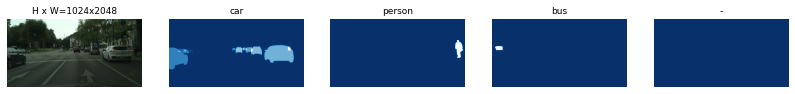

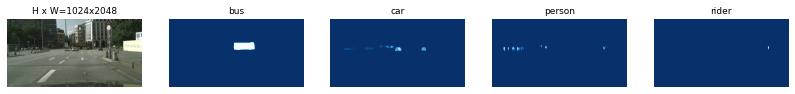

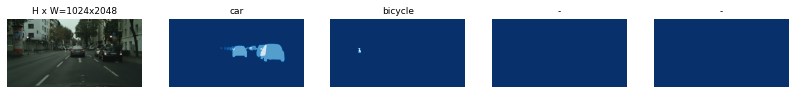

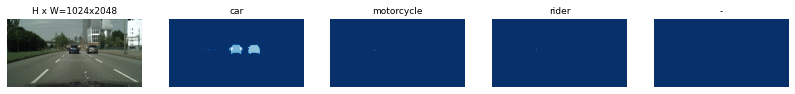

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

## Bounding boxes
Rather than using bounding box coordinates provided by the source datasets,compute the bounding boxes from masks instead. This makes it easier to resize, rotate, or crop images: generate the bounding boxes from the updates masks rather than computing bounding box transformation for each type of image transformation.

image_id  1395 /content/drive/MyDrive/cityscapes/dataset/Semantic/Input/Train/hamburg/hamburg_000000_102574_leftImg8bit.png
image                    shape: (1024, 2048, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 2048, 34)      min:    0.00000  max:    1.00000  bool
class_ids                shape: (34,)                 min:    1.00000  max:   10.00000  int32
bbox                     shape: (34, 4)               min:   98.00000  max: 2047.00000  int32


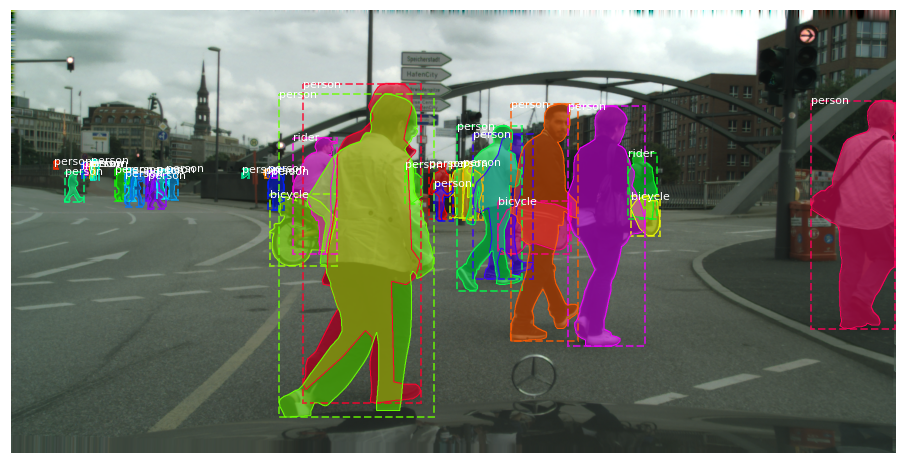

In [ ]:
# Load random image and mask.
image_id = np.random.choice(dataset_train.image_ids)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_train.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

## Mini masks
To improve training speed, we optimize masks by:
- Store mask pixels that are inside the object bounding box, rather than a mask of the full image. Most objects are small compared to the image size, so we save space by not storing a lot of zeros around the object.
- Resize the mask to a smaller size (e.g. 56x56). For objects that are larger than the selected size we lose a bit of accuracy. But most object annotations are not very accuracy to begin with, so this loss is negligable for most practical purposes. Thie size of the mini_mask can be set in the config class.

### Not using mini masks

In [ ]:
class MaskConfig(CityscapesConfig):
    """Configuration for training on the Cityscapes dataset.
    Derives from the CityscapeConfig class and overrides some values.
    """   
    USE_MINI_MASK = False

config_no_mini_mask = MaskConfig()
config_no_mini_mask.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        150
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  2048
IMAGE_META_SIZE                23
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [1024 2048    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

image                    shape: (1024, 2048, 3)       min:    0.00000  max:  184.00000  uint8
image_meta               shape: (23,)                 min:    0.00000  max: 2048.00000  int64
class_ids                shape: (3,)                  min:    1.00000  max:   10.00000  int32
bbox                     shape: (3, 4)                min:  239.00000  max: 2048.00000  int32
mask                     shape: (1024, 2048, 3)       min:    0.00000  max:    1.00000  bool


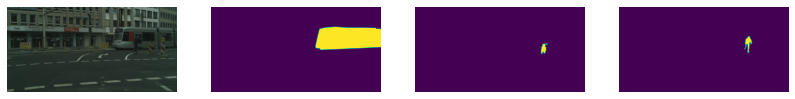

In [ ]:
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset_train, config_no_mini_mask, image_id)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

visualize.display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))], cmap='Blues_r')

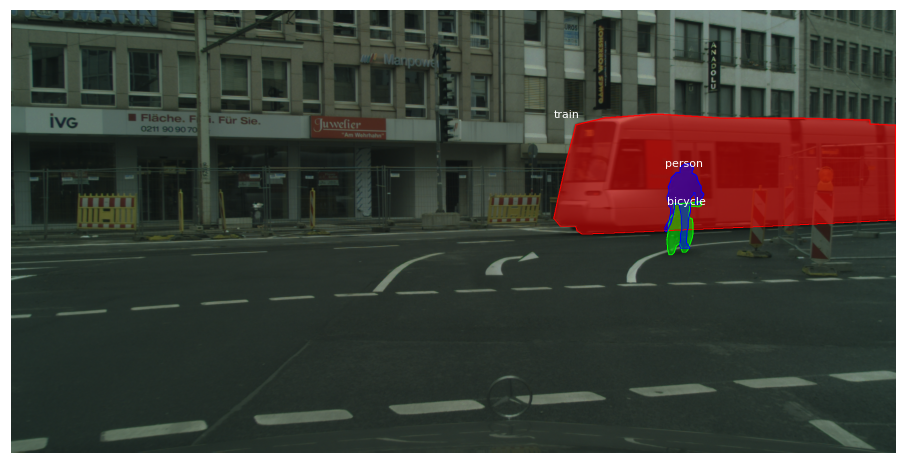

In [ ]:
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names, show_bbox=False)

### Using mini masks

In [ ]:
class MaskConfig(CityscapesConfig):
    """Configuration for training on the Cityscapes dataset.
    Derives from the CityscapeConfig class and overrides some values.
    """   
    USE_MINI_MASK = True

config_mini_mask = MaskConfig()
config_mini_mask.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        150
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  2048
IMAGE_META_SIZE                23
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [1024 2048    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

image                    shape: (1024, 2048, 3)       min:    0.00000  max:  184.00000  uint8
image_meta               shape: (23,)                 min:    0.00000  max: 2048.00000  int64
class_ids                shape: (3,)                  min:    1.00000  max:   10.00000  int32
bbox                     shape: (3, 4)                min:  239.00000  max: 2048.00000  int32
mask                     shape: (56, 56, 3)           min:    0.00000  max:    1.00000  bool


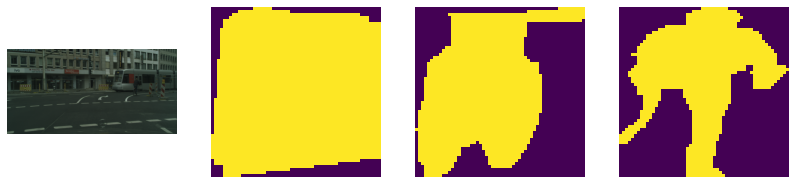

In [ ]:
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset_train, config_mini_mask, image_id)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

visualize.display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))], cmap='Blues_r')

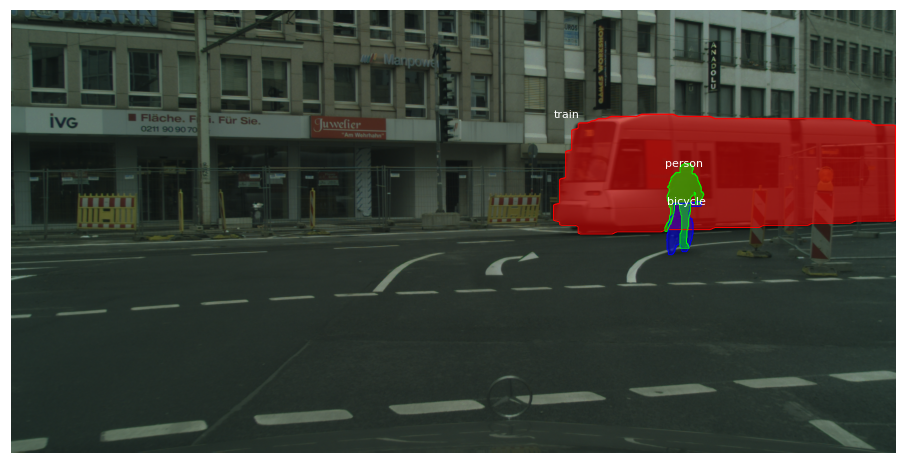

In [ ]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names, show_bbox=False)

# Utility

image_id  1083 /content/drive/MyDrive/cityscapes/dataset/Semantic/Input/Train/dusseldorf/dusseldorf_000151_000019_leftImg8bit.png
image                    shape: (1024, 2048, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 2048, 17)      min:    0.00000  max:    1.00000  bool
class_ids                shape: (17,)                 min:    1.00000  max:   10.00000  int32
bbox                     shape: (17, 4)               min:  321.00000  max: 1975.00000  int32


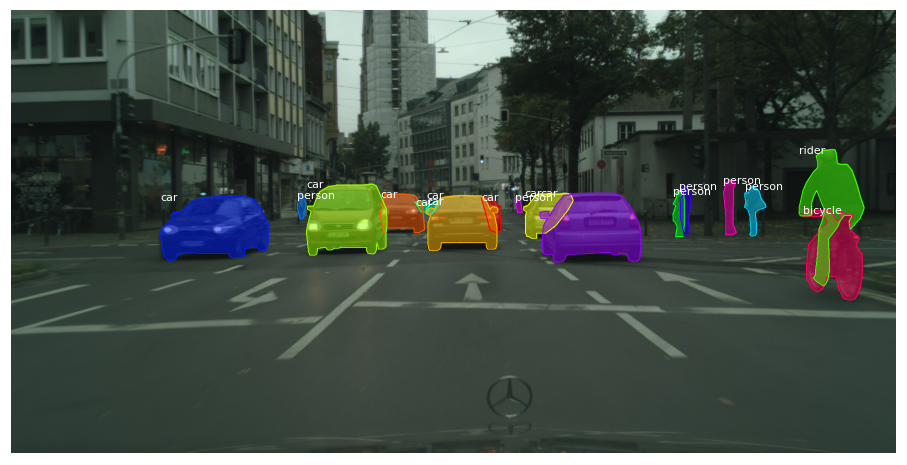

In [ ]:
# Load random image and mask.
# image_id = np.random.choice(dataset_train.image_ids)
# taset_train.image_info.index(x) for x in dataset_train.image_info if x['id'] == 'dusseldorf_000151_000019']
image_id = 1083
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_train.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names, show_bbox=False)

In [ ]:
image_id = 1083

image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names, limit=1)

TypeError: ignored

image_id  1083 /content/drive/MyDrive/cityscapes/dataset/Semantic/Input/Train/dusseldorf/dusseldorf_000151_000019_leftImg8bit.png
image                    shape: (1024, 2048, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 2048, 17)      min:    0.00000  max:    1.00000  bool
class_ids                shape: (17,)                 min:    1.00000  max:   10.00000  int32
bbox                     shape: (17, 4)               min:  321.00000  max: 1975.00000  int32


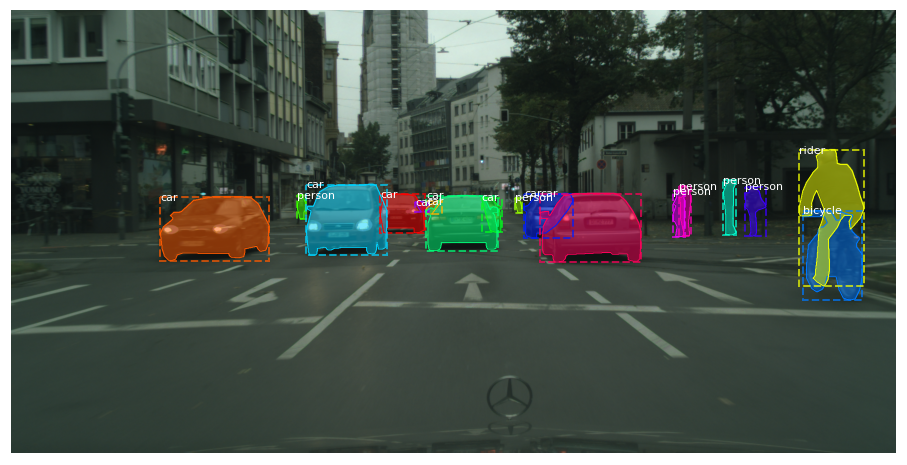

In [ ]:
# Load random image and mask.
image_id = 1083
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_train.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        150
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  2048
IMAGE_META_SIZE                23
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [1024 2048    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

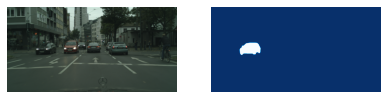

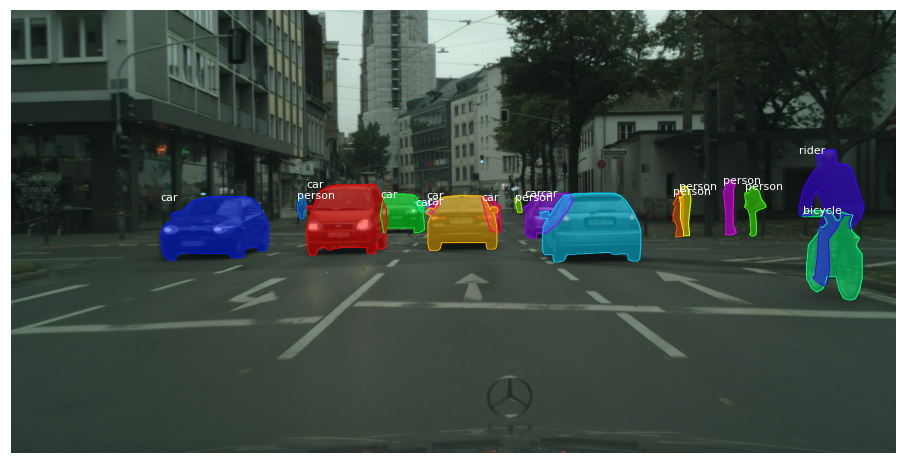

In [ ]:
class MaskConfig(CityscapesConfig):
    """Configuration for training on the Cityscapes dataset.
    Derives from the CityscapeConfig class and overrides some values.
    """   
    USE_MINI_MASK = False

config_no_mini_mask = MaskConfig()
config_no_mini_mask.display()

image_id = 1083
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset_train, config_no_mini_mask, image_id)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

visualize.display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 1))], cmap='Blues_r')

visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names, show_bbox=False)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        150
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  2048
IMAGE_META_SIZE                23
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [1024 2048    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

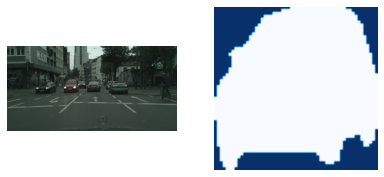

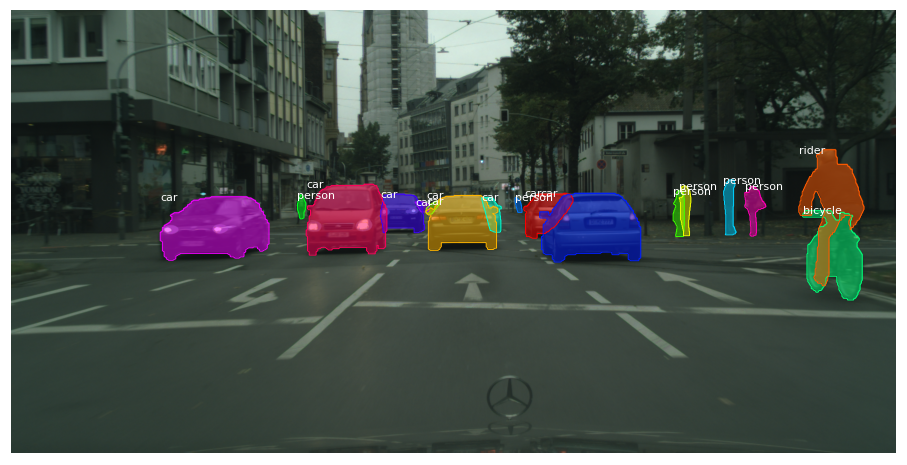

In [ ]:
class MaskConfig(CityscapesConfig):
    """Configuration for training on the Cityscapes dataset.
    Derives from the CityscapeConfig class and overrides some values.
    """   
    USE_MINI_MASK = True

config_mini_mask = MaskConfig()
config_mini_mask.display()

image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset_train, config_mini_mask, image_id)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

visualize.display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 1))], cmap='Blues_r')

mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names, show_bbox=False)